# **Homework 1**: Introduction to Numpy (solutions)

### Python setup

In [39]:
# Run me first!
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

## **Part 1**: Numpy basics

As discussed in class, a square matrix $A$ defines a linear mapping: $\mathbb{R}^n\rightarrow \mathbb{R}^n$. Given a vector $\textbf{x}$, we can find the corresponding output of this mapping $\textbf{b}$ using matrix-vector multiplication: $\textbf{b}=A \textbf{x}$. We can write an example matrix-multiplication using matrix notation as:

$$\begin{bmatrix}
4 & -3 & 2 \\
6 & 5  & 1 \\
-4 & -1 & 2
\end{bmatrix} \cdot \begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}
= \begin{bmatrix}
? \\
? \\
?
\end{bmatrix}
$$

#### **Q1** 
Perform this matrix-vector multiplication by hand and write the answer in the cell below.

#### Answer
Performing the matrix-vector multiplication by hand:

$$\begin{bmatrix}
4 & -3 & 2 \\
6 & 5  & 1 \\
-4 & -1 & 2
\end{bmatrix} \cdot \begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}
= \begin{bmatrix}
4(1) + (-3)(-2) + 2(1) \\
6(1) + 5(-2) + 1(1) \\
-4(1) + (-1)(-2) + 2(1)
\end{bmatrix}
= \begin{bmatrix}
4 + 6 + 2 \\
6 - 10 + 1 \\
-4 + 2 + 2
\end{bmatrix}
= \begin{bmatrix}
12 \\
-3 \\
0
\end{bmatrix}
$$


<div style="page-break-after: always; visibility: hidden"> 
\pagebreak 
</div>

#### **Q2** 
In the code cell below, create the matrix $A$ and the vector $\textbf{x}$ shown above, using Numpy. Then use the `np.dot` function to find the output of the mapping $\textbf{b} = A\textbf{x}$. Verify that the answer matches what you derived above.

#### Answer

In [40]:
# Fill answers here
A = np.array([[4, -3, 2],
              [6, 5, 1],
              [-4, -1, 2]
              ])
x = np.array([1, -2, 1])
b = np.dot(A, x)

print(b)

[12 -3  0]


Often we will have access to the transformed vector $\textbf{b}$ and need to find the orginal vector $\textbf{x}$. To do this we need to *solve* the system of linear equations $A\textbf{x}=\textbf{b}$ for $\textbf{x}$.
$$\begin{bmatrix}
4 & -3 & 2 \\
6 & 5  & 1 \\
-4 & -1 & 2
\end{bmatrix} \cdot \begin{bmatrix}
? \\
? \\
?
\end{bmatrix} = \begin{bmatrix}
2 \\
-1 \\
3
\end{bmatrix}
$$

#### **Q3** 
Find the missing $\textbf{x}$ in the equation above using the `np.linalg.solve` function and verify that $A\textbf{x}=\textbf{b}$.

#### Answer

In [41]:
b = np.array([2, -1, 3])
x = np.linalg.solve(A, b)
print(b, np.dot(A, x))

[ 2 -1  3] [ 2. -1.  3.]


In linear algebra you may have learned how to solve a system of linear equations using Gaussian elimination. Here we will implement an alternative approach known as *Richardson iteration*. In this method we start with an inital guess for the solution: $\textbf{x}^{(0)}$, then we will iteratively update this guess until the solution is reached. Given a matrix $A$, a target $\textbf{b}$ and a current guess $\textbf{x}^{(k)}$, we can compute the Richardson update as:

$$\textbf{x}^{(k+1)} \leftarrow \textbf{x}^{(k)} + \omega \left(\textbf{b} - A\textbf{x}^{(k)}\right)$$

Here $\omega$ is a constant that we can choose to adjust the algorithm. We will set $\omega = 0.1$.

#### **Q4** 
Fill in the Richardson iteration function below and apply it to the system of linear equations from above using 100 updates. Verify that if gives a similar answer to `np.linalg.solve`.

#### Answer

In [42]:
# Fill in function below
def richardson_iter(x_guess, A, b, omega=0.1):
    new_x_guess = x_guess + omega * (b - np.dot(A, x_guess))
    return new_x_guess

x_guess = np.zeros(3)
for i in range(100):
    x_guess = richardson_iter(x_guess, A, b)

print(x_guess, x)

[-0.175 -0.2    1.05 ] [-0.175 -0.2    1.05 ]


Recall that the length of a vector is given by it's *two-norm*, which is defined as:
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}.$$


Correspondingly, the (Euclidian) distance between two points $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$ can be written as $\|\mathbf{a} - \mathbf{b}\|_2$. As a convenient measure of error for our Richardson iteration algorithm, we will use the *squared Euclidean distance*. For a guess $\mathbf{x}^{(k)}$ we will compute the error $e^{(k)}$ as:
$$e^{(k)} = \|A\mathbf{x}^{(k)} - \mathbf{b}\|_2^2$$

In expanded form, this would be written as:
$$e^{(k)} = \sum_{i=1}^n \left(\sum_{j=1}^n A_{ij}x^{(k)}_j - b_i\right)^2$$

#### **Q5** 
Write a function to compute the error of a given guess. Then run Richardson iteration again for 100 steps, computing the error at each step. Finally create a plot of the error for each step (error vs. step). [Plot reference](https://cs152.github.io/lecture1-background/notes.html#scatterplots-and-line-plots)

*Hint: recall that basic operations in numpy (addition, subtraction, powers) are performed element-wise.*

#### Answer

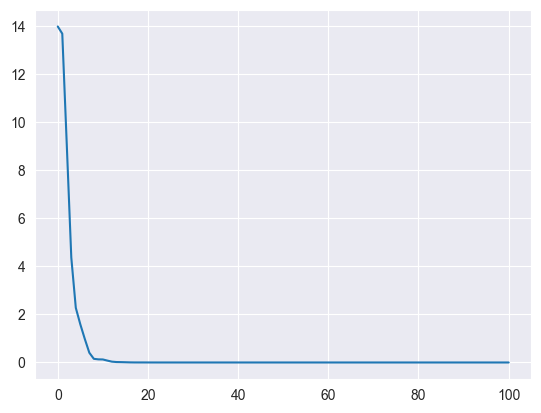

In [43]:
def error(x_guess, A, b):
    err = (np.dot(A, x_guess) - b) ** 2
    err = err.sum()
    return err

# Add code to plot the error over time
x_guess = np.zeros(3)
all_errors = [error(x_guess, A, b)]
for step in range(100):
    
    x_guess = richardson_iter(x_guess, A, b)
    all_errors.append(error(x_guess, A, b))

plt.plot(all_errors)

#### **Q6** 
Derive the partial derivative of the error with respect to a single entry of $\mathbf{x}^{(k)}$ (without loss of generality, we will say $x^{(k)}_1$). Work in the *expanded form* as in the equation above, writing your answer in the markdown cell below.

*Hint: You may find it helpful to refer to the latex equation cheatsheet on the course website. You may show intermediate steps here or as handwritten work as a separate file in the repository. The final answer should be filled in here.*

#### Answer
$$\frac{\partial e^{(k)}}{\partial x^{(k)}_1}=  \frac{\partial}{\partial x^{(k)}_1} \sum_{i=1}^n \left(\sum_{j=1}^n A_{ij}x^{(k)}_j - b_i\right)^2$$

Apply sum and chain rules
$$=   2\sum_{i=1}^n \left(\sum_{j=1}^n A_{ij}x^{(k)}_j - b_i\right) \frac{\partial}{\partial x^{(k)}_1}\left(\sum_{j=1}^n A_{ij}x^{(k)}_j - b_i\right)$$
Apply sum rule noting that $\frac{\partial}{\partial x^{(k)}_1}A_{ij}x_{j} = 0$ for $j\neq 1$.


$$=2\sum_{i=1}^n \left(\sum_{j=1}^n A_{ij}x^{(k)}_j - b_i\right) A_{i1}$$

In practice, we will likely want to compute the derivative with respect to *all* entries of $\mathbf{x}$:
$$\frac{\partial e^{(k)}}{\partial \mathbf{x}^{(k)}} = \begin{bmatrix}
\frac{\partial e^{(k)}}{\partial x^{(k)}_1} \\
 \vdots \\
\frac{\partial e^{(k)}}{\partial x^{(k)}_n}
\end{bmatrix}$$

#### **Q7** 
Using the formula you just derived, write the formula for the vector of all partial derivatives in the compact matrix/vector notation (e.g. $A\mathbf{x}=\mathbf{b}$).

#### Answer

$\sum_{j=1}^n A_{ij}x^{(k)}_j$ of the $i^{th}$ entry of the matrix-vector product $\mathbf{A}\mathbf{x}^{(k)}$
$$=2\sum_{i=1}^n \left( (\mathbf{A}\mathbf{x}^{(k)})_i - b_i\right) A_{i1}$$

Similarly subtracting $b_i$ corresponds to vector subtraction with the vector $\mathbf{b}$
$$=2\sum_{i=1}^n \left( \mathbf{A}\mathbf{x}^{(k)} - \mathbf{b}\right)_i A_{i1}$$

Finally we're left with the equivalent of a dot product for entry 1!


$$\frac{\partial e^{(k)}}{\partial x_1^{(k)}}= 2 \left( \mathbf{A}\mathbf{x}^{(k)} - \mathbf{b}\right)^T \mathbf{A}_{1}$$

If we remove the index into $\mathbf{A}$, we get an expression for the gradient!
$$\frac{\partial e^{(k)}}{\partial \mathbf{x}^{(k)}}= 2 \left( \mathbf{A}\mathbf{x}^{(k)} - \mathbf{b}\right)^T \mathbf{A}$$

#### **Q8** 
Do you notice any relationship between this result and the Richardson iteration algorithm above? (1-2 sentences) *We will discuss this more in class!*

#### Answer

We see that this gradient is *almost* equivalent to the update we made in our Richardson iteration, but scaled by $-2\mathbf{A}$!

## Part 2: Working with batches of vectors

Recall that a vector can also be seen as either an $n \times 1$ matrix (column vector) or a $1 \times n$ matrix (row vector).

$$\text{Column vector: } \mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}, \quad \text{Row vector: } \mathbf{x}^T = \begin{bmatrix}
x_1 & x_2 & x_3
\end{bmatrix}$$

Note that we use the same notation for both as they refer to the same concept (a vector). The difference becomes relevant when we consider matrix-vector multiplication. We can write matrix-vector multiplication in two ways: $$\text{Matrix-vector: }A\mathbf{x} = \mathbf{b}, \quad \text{Vector-matrix: }\mathbf{x}^TA^T= \mathbf{b}^T$$
In *matrix-vector multiplication* we treat $\textbf{x}$ as a column vector ($n \times 1$ matrix), while in *vector-matrix multiplication* we treat it as a row vector ($n \times 1$ matrix). Transposing $A$ for left multiplication ensures that the two forms give the same answer.

#### **Q9** 
Using the previously defined $\mathbf{x}$, create an explicit column vector and row vector. Then using the previously defined $A$, verify that the matrix-vector and vector-matrix multiplications shown above do produce the same resultant vector $\mathbf{b}$.

*Hint: Recall that* `np.dot` *is also used for matrix-matrix multiplication. The values of $\mathbf{x}$ and $A$ are:*
$$\mathbf{x} = \begin{bmatrix}
1 \\
-2 \\
1
\end{bmatrix}, \quad A = \begin{bmatrix}
4 & -3 & 2 \\
6 & 5  & 1 \\
-4 & -1 & 2
\end{bmatrix}$$

#### Answer

In [44]:
x_col = x[:, None] # Add new diminsion 1
x_row = x[None, :] # Add new dimension 0
print(np.dot(A, x_col), np.dot(x_row, A.T))

[[ 2.]
 [-1.]
 [ 3.]] [[ 2. -1.  3.]]


The distinction between row and column vectors also affects the behaivior of other operations on `np.array` objects, particularly through the concept of [*broadcasting*](https://cs152.github.io/lecture1-background/notes.html#element-wise-matrix-operations).

#### **Q10** 
Consider a $3 \times 3$ matrix of all ones as defined in code below, along with the 1-d vector $\mathbf{x}$.

In [45]:
ones = np.ones((3, 3))
x = np.array([1, -2, 1])
ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Complete the line of code below such that the result of the operation is:

$$\begin{bmatrix}
1 & -2 & 1 \\
1 & -2  & 1 \\
1 & -2 & 1
\end{bmatrix}$$

*Hint: You should replace `SHAPE` with an appropriate shape for broadcasting and `OPERATION` with an appropriate operation (e.g. `+, -, *, /`)*

#### Answer

In [46]:
result = ones * x.reshape((1, -1))
print(result)

[[ 1. -2.  1.]
 [ 1. -2.  1.]
 [ 1. -2.  1.]]


Throughout this course we will typically use row vectors and vector-matrix multiplication, as this is more conventional in neural-network literature. The concept of row and column vectors becomes handy when transforming *collections* of vectors.

Recall that a matrix can be seen as a collection of vectors. In numpy we can create a matrix from a list of (1- dimensional) vectors using the `np.stack` function. This function assumes that the vectors are row vectors creating the matrix as follows:
$$\begin{bmatrix}
3 & 1 & -2
\end{bmatrix},\ \begin{bmatrix}
4 & 5 & 3
\end{bmatrix},\ \begin{bmatrix}
-2 & -1 & 5
\end{bmatrix}\quad \overset{\text{np.stack}}{\longrightarrow} \begin{bmatrix}
3 & 1 & -2 \\
4 & 5 & 3 \\
-2 & -1 & 5
\end{bmatrix} $$

We will call this matrix $X$ to denote that it is a collection of vectors, rather than a single vector ($\mathbf{x}$).

#### **Q11** 
Create this matrix in numpy using th `np.stack` function.

#### Answer

In [47]:
X = np.stack([np.array([3, 1, -2]), np.array([4, 5, 3]), np.array([-2, -1, 5])])
print(X)

[[ 3  1 -2]
 [ 4  5  3]
 [-2 -1  5]]


When taken together as a matrix in this way, we can apply the linear mapping $A$ to all vectors using matrix-matrix multiplication:
$$B=XA^T$$

Let's put this into practice with a visual example.

#### **Q12** 
Create a $20 \times 3$ matrix, `circle`, in numpy of the following form

$$ \begin{bmatrix} \sin(\theta_1) & \cos(\theta_1)  & 1 \\
\sin(\theta_2) & \cos(\theta_2)  & 1 \\
\vdots & \vdots & \vdots \\
\sin(\theta_{20}) & \cos(\theta_{20})  & 1 \\
 \end{bmatrix}$$
 Where $\theta_1...\theta_{20}$ are evenly spaced between $0$ and $2\pi$.

#### Answer

In [48]:
theta = np.linspace(0, 2 * np.pi, 20) # Generates 20 evenly-spaced numbers between 0 and 2π

circle = np.stack([np.sin(theta), np.cos(theta), np.ones_like(theta)]).T


The code we just wrote creates a matrix corresponding to a collection of $20$ row vectors of length 3. Each vector represents a point on the unit circle where the first entry is the x-coordinate, the second entry is the y-coordinate and the third entry is always $1$:
$$ \begin{bmatrix} x & y & 1 \end{bmatrix}$$

#### **Q13** 
Plot the set of 20 points in `circle` using the `plt.plot` function. *Use only the x and y coordinates, ignoring the column of 1s.*

#### Answer

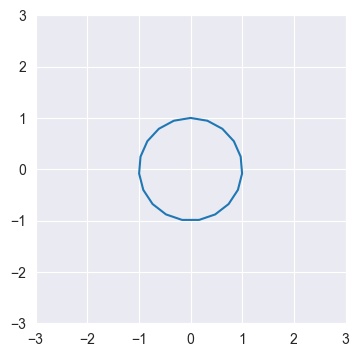

In [49]:
plt.figure(figsize=(4, 4))
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.plot(circle[:, 0], circle[:, 1])


#### **Q14** 
Transform all the vectors in `circle` with the matrix $A$ using a single call to `np.dot`. Then plot the original set of points in black and the transformed points in red using the `plt.plot` function.

*You might also consider why we added the extra column of 1s! We will discuss the answer to that in class. $A$ is the same matrix from q1.*

#### Answer

In [50]:
transformed_circle = np.dot(circle, A)

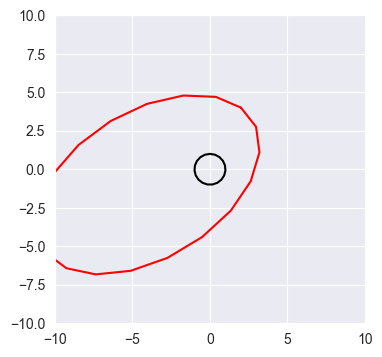

In [51]:
plt.figure(figsize=(4, 4))
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.plot(circle[:, 0], circle[:, 1], c='k')
plt.plot(transformed_circle[:, 0], transformed_circle[:, 1], c='r')

#### **Q15** 
Finally, shift all the vectors in `transformed_circle` by the vector $\mathbf{b}$ defined below, that is, add $\mathbf{b}$ to every *row* of the output matrix. Again plot the original set of points in black and the transformed points in red using the `plt.plot` function.

*Hint: the solution to this question should **not** involve any loops, instead use broadcasting.*

In [52]:
b = np.array([4, 1.2, 0])
transformed_circle = np.dot(circle, A) + b

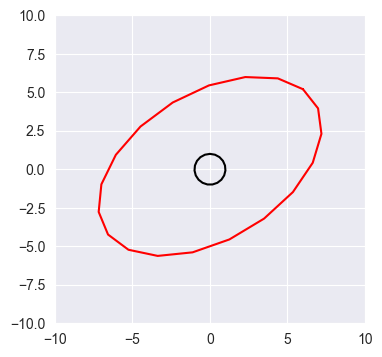

In [53]:
plt.figure(figsize=(4, 4))
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.plot(circle[:, 0], circle[:, 1], c='k')
plt.plot(transformed_circle[:, 0], transformed_circle[:, 1], c='r')

## Part 3: Loading and visualizing data

For most of this class we will be working with real-world data. A very well-known dataset in statistics is the [*Iris flower dataset*](https://en.wikipedia.org/wiki/Iris_flower_data_set) collected by Edgar Anderson in 1929. The dataset consists of measurments of iris flowers. Each flower has 4 collected measurements: sepal length, sepal width, petal length, petal width, as well as a classification into one of 3 species: *Iris setosa*, *Iris versicolor* and *Iris virginica*. We will return to this dataset in the next homework.

We can load this dataset as Numpy objects using the Scikit-Learn library. Below we've extrated 4 relevant arrays:
- `features`: a matrix which has one row per observed flower and one column per measurement.
- `targets`: An array that specifies the species of each flower as a number 0-2.
- `feature_names`: a list of strings with the name of each measurement.
- `target_names`: a list of strings with the name of each species.

In this homework, we will only visualize this dataset, which is typically a good first step in working with a new type of data. We'll start by just looking at 2 measurements *sepal length* and *petal length*, along with the species.

#### **Q16** 
Based on the Iris dataset loaded below, how many flowers did Edgar Anderson measure?

*In other words, how many observations are in this dataset?*

#### Answer

In [54]:
import sklearn.datasets as datasets
dataset = datasets.load_iris()
features = dataset['data']
targets = dataset['target']
feature_names = dataset['feature_names']
target_names = dataset['target_names']

# Answer
num_observations = features.shape[0]
print(num_observations)

150


Fill in the code to create a scatterplot for the Iris dataset below. Plot *sepal length* on the **x-axis** and *petal length* on the **y-axis**. Set the **color** to correspond to the *species*.

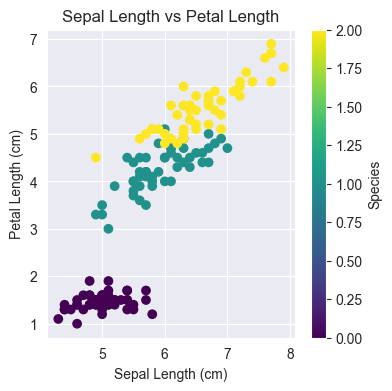

In [55]:
# Fill your code here

plt.figure(figsize=(4, 4))
plt.scatter(features[:, 0], features[:, 2], c=targets, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.colorbar(label='Species')